In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns

In [3]:
sns.set_context('poster', font_scale=1.25)

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from LB_D2Q9 import pipe_cython as lb

We now want to visualize the evolution of the flow...let's see how it goes...

In [22]:
from IPython import display

KeyboardInterrupt: 

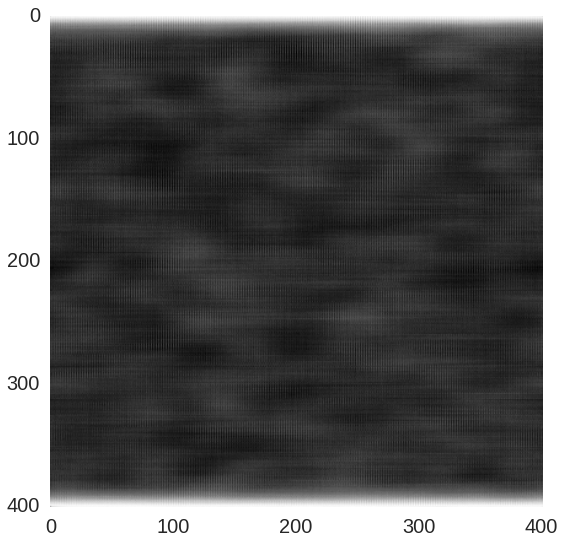

In [24]:
sim = lb.Pipe_Flow(lx=400, ly=400, tau=5)

total_num_steps = 100
steps_per_image= 1

num_to_record = int(np.ceil(float(total_num_steps)/steps_per_image))
for i in range(num_to_record):
    velocity_magnitude = np.sqrt(sim.u**2 + sim.v**2)
    plt.imshow(velocity_magnitude.T)
    plt.grid(False)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    #plt.pause(10.**-6.)
    
    sim.run(steps_per_image)

In [7]:

sim.run(1)

In [8]:
sim.u

array([[  2.21792789e-07,   4.05322004e-04,   1.25717348e-03, ...,
          1.27225311e-03,   4.23520163e-04,  -3.48975271e-04],
       [ -3.72529776e-08,   4.86750796e-04,   1.32652780e-03, ...,
          1.21644652e-03,   3.75144067e-04,  -1.75218505e-04],
       [ -3.72528248e-08,   3.61963030e-04,   1.21300132e-03, ...,
          1.32146338e-03,   4.74586996e-04,  -1.57814604e-04],
       ..., 
       [ -1.59424584e-04,   3.65760934e-04,   1.21542264e-03, ...,
          1.31488696e-03,   4.68111015e-04,   0.00000000e+00],
       [ -1.76999325e-04,   4.84691816e-04,   1.32398179e-03, ...,
          1.21868646e-03,   3.78107274e-04,   0.00000000e+00],
       [ -3.52680014e-04,   4.14715556e-04,   1.26625830e-03, ...,
          1.26161939e-03,   4.13582457e-04,   2.21511357e-07]], dtype=float32)

Unfortunately, when we are showing images, everything is actually flipped from simulation coordinates to image coordinates. We have to transpose...

<matplotlib.colorbar.Colorbar instance at 0x7f0d0a39f710>

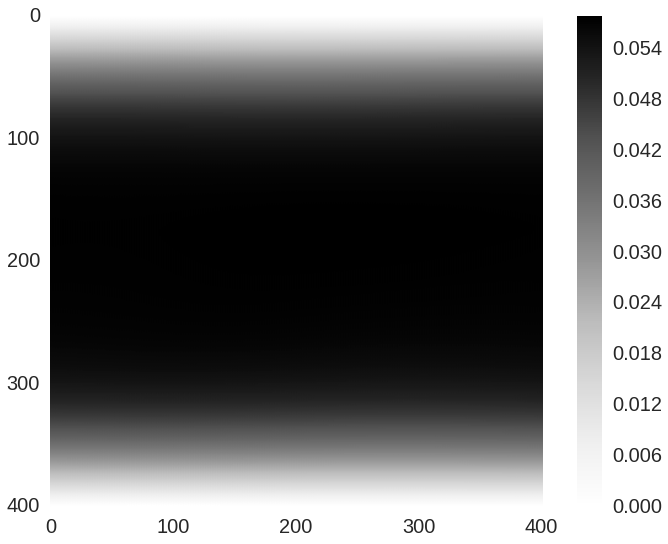

In [14]:
velocity_magnitude = np.sqrt(sim.u**2 + sim.v**2)
plt.imshow(velocity_magnitude.T)
plt.grid(False)
plt.colorbar()

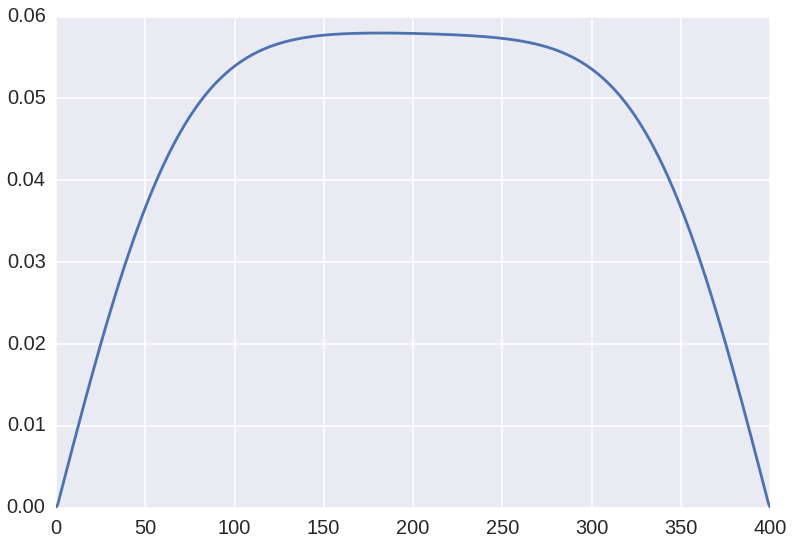

In [15]:
plt.plot(velocity_magnitude[200, :])

<matplotlib.colorbar.Colorbar instance at 0x7f0d0a1fbe60>

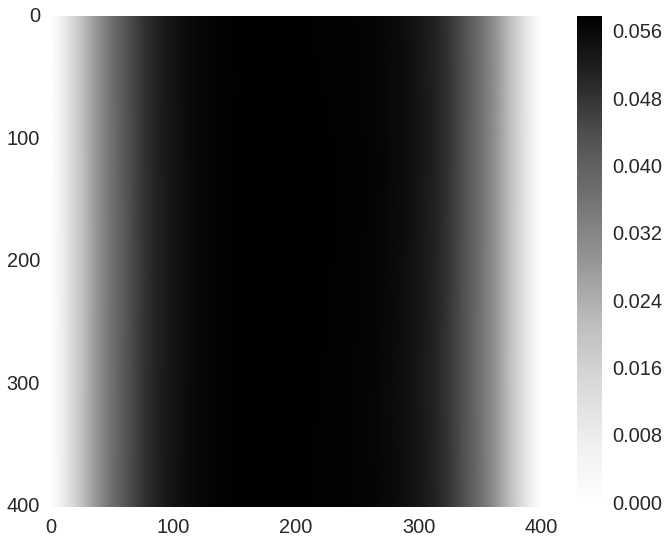

In [16]:
plt.imshow(sim.u)
plt.grid(False)
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7f0d0a0cecb0>

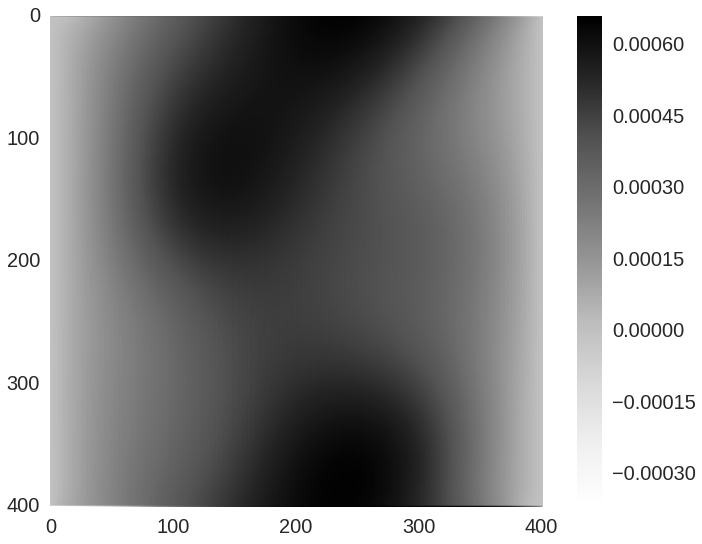

In [17]:
plt.imshow(sim.v)
plt.grid(False)
plt.colorbar()

Well, this is promising. Excellent. What now? Let's try to visualize the flow...in real time.